In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
from armain import Scaler, DataLoader, RidgeRegression, BatchRegression

In [3]:
data = pd.read_csv("Dummy-Data-HSS.csv")
data.drop(columns=["Influencer"], inplace=True)
data.fillna(0, inplace=True)

data.head(10)

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


In [4]:
scaler = Scaler()

scaler.standardize(data, exclude=["Sales"])

In [5]:
target_label = "Sales"
data_split = 0.8

In [6]:
data_loader = DataLoader(data,
                           target_label=target_label,
                           split=data_split)

data_loader.head(10)

,TV,Radio,Social Media,Sales
0,-1.447401,-1.195158,-0.185872,54.732757
1,-1.561825,-0.919390,-0.410942,46.677897
2,-0.493874,-0.233083,-0.183421,150.177829
3,1.108052,1.225849,1.626880,298.246340
4,-1.485542,-1.002007,-0.864125,56.594181
5,-0.951567,-0.880514,-1.035196,105.889148
6,0.040102,0.696698,0.430803,198.679825
7,-0.875285,-0.081488,-0.465001,108.733932
8,0.841065,0.671417,1.720722,270.189400
9,-1.561825,-1.828452,-0.492290,48.280582


In [31]:
log_scales = [0.01, 0.1, 1, 10]
cf_rmsd = []
gd_r_rmsd = []
gd_l_rmsd = []

In [32]:
for scale in log_scales:
    cf = RidgeRegression(lambda_=scale)

    _, cf_val_rmsd = cf.train(data_loader)

    cf_rmsd.append(cf_val_rmsd.sum())

In [33]:
for scale in log_scales:
    gd_r = BatchRegression()

    _, gd_r_val_rmsd = gd_r.train(data_loader, epoch=10, learning_rate=0.0001, ridge=scale)

    gd_r_rmsd.append(sum(gd_r_val_rmsd))

In [34]:
for scale in log_scales:
    gd_l = BatchRegression()

    _, gd_l_val_rmsd = gd_l.train(data_loader, epoch=10, learning_rate=0.0001, lasso=scale)

    gd_l_rmsd.append(sum(gd_l_val_rmsd))

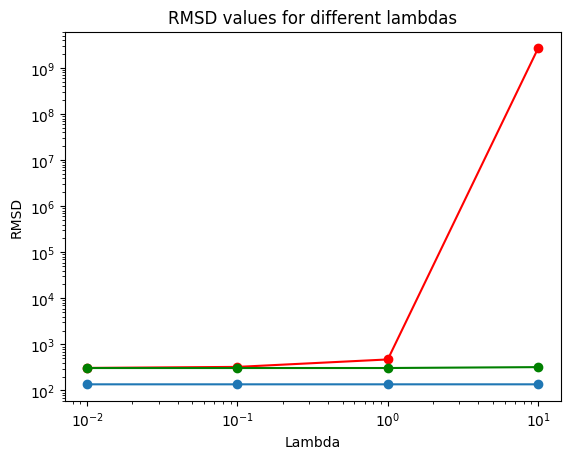

In [37]:
plt.plot(log_scales, cf_rmsd, marker='o')
plt.plot(log_scales, gd_r_rmsd, marker='o', color="red")
plt.plot(log_scales, gd_l_rmsd, marker='o', color="green")

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Lambda')
plt.ylabel('RMSD')
plt.title('RMSD values for different lambdas')

plt.show()